In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Computer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as msno
plt.rc('font', family='D2Coding')
from plotnine import *

In [7]:
house = pd.read_csv('./data/서울특별시_전월세가_2022.csv')
house.head()

,접수년도,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,...,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,종전임대료
0,2022,11560,영등포구,12600,양평동2가,1.0,대지,1.0,3.0,6.0,...,16000,0,힘멜하임,2014.0,오피스텔,22.01~24.01,신규,NaN,0.0,NaN
1,2022,11560,영등포구,11800,도림동,NaN,NaN,NaN,NaN,NaN,...,300,30,NaN,1986.0,단독다가구,NaN,NaN,NaN,NaN,NaN
2,2022,11215,광진구,10700,화양동,1.0,대지,111.0,12.0,19.0,...,10000,135,NaN,2021.0,오피스텔,22.01~24.01,신규,NaN,0.0,0.0
3,2022,11620,관악구,10100,봉천동,NaN,NaN,NaN,NaN,NaN,...,4000,40,NaN,2019.0,단독다가구,22.02~23.02,신규,NaN,0.0,0.0
4,2022,11620,관악구,10100,봉천동,NaN,NaN,NaN,NaN,NaN,...,13000,0,NaN,2019.0,단독다가구,22.01~24.01,신규,NaN,0.0,NaN


In [8]:
house.columns

Index(['접수년도', '자치구코드', '자치구명', '법정동코드', '법정동명', '지번구분코드', '지번구분', '본번', '부번',
       '층', '계약일', '전월세구분', '임대면적', '보증금(만원)', '임대료(만원)', '건물명', '건축년도',
       '건물용도', '계약기간', '신규계약구분', '갱신청구권사용', '종전보증금', '종전임대료'],
      dtype='object')

In [9]:
house.drop(['지번구분코드', '지번구분', '본번', '부번','층', '건축년도', '건물용도', '계약기간', '신규계약구분',
       '갱신청구권사용', '종전보증금', '종전임대료'] ,axis=1, inplace=True)
house.columns

Index(['접수년도', '자치구코드', '자치구명', '법정동코드', '법정동명', '계약일', '전월세구분', '임대면적',
       '보증금(만원)', '임대료(만원)', '건물명'],
      dtype='object')

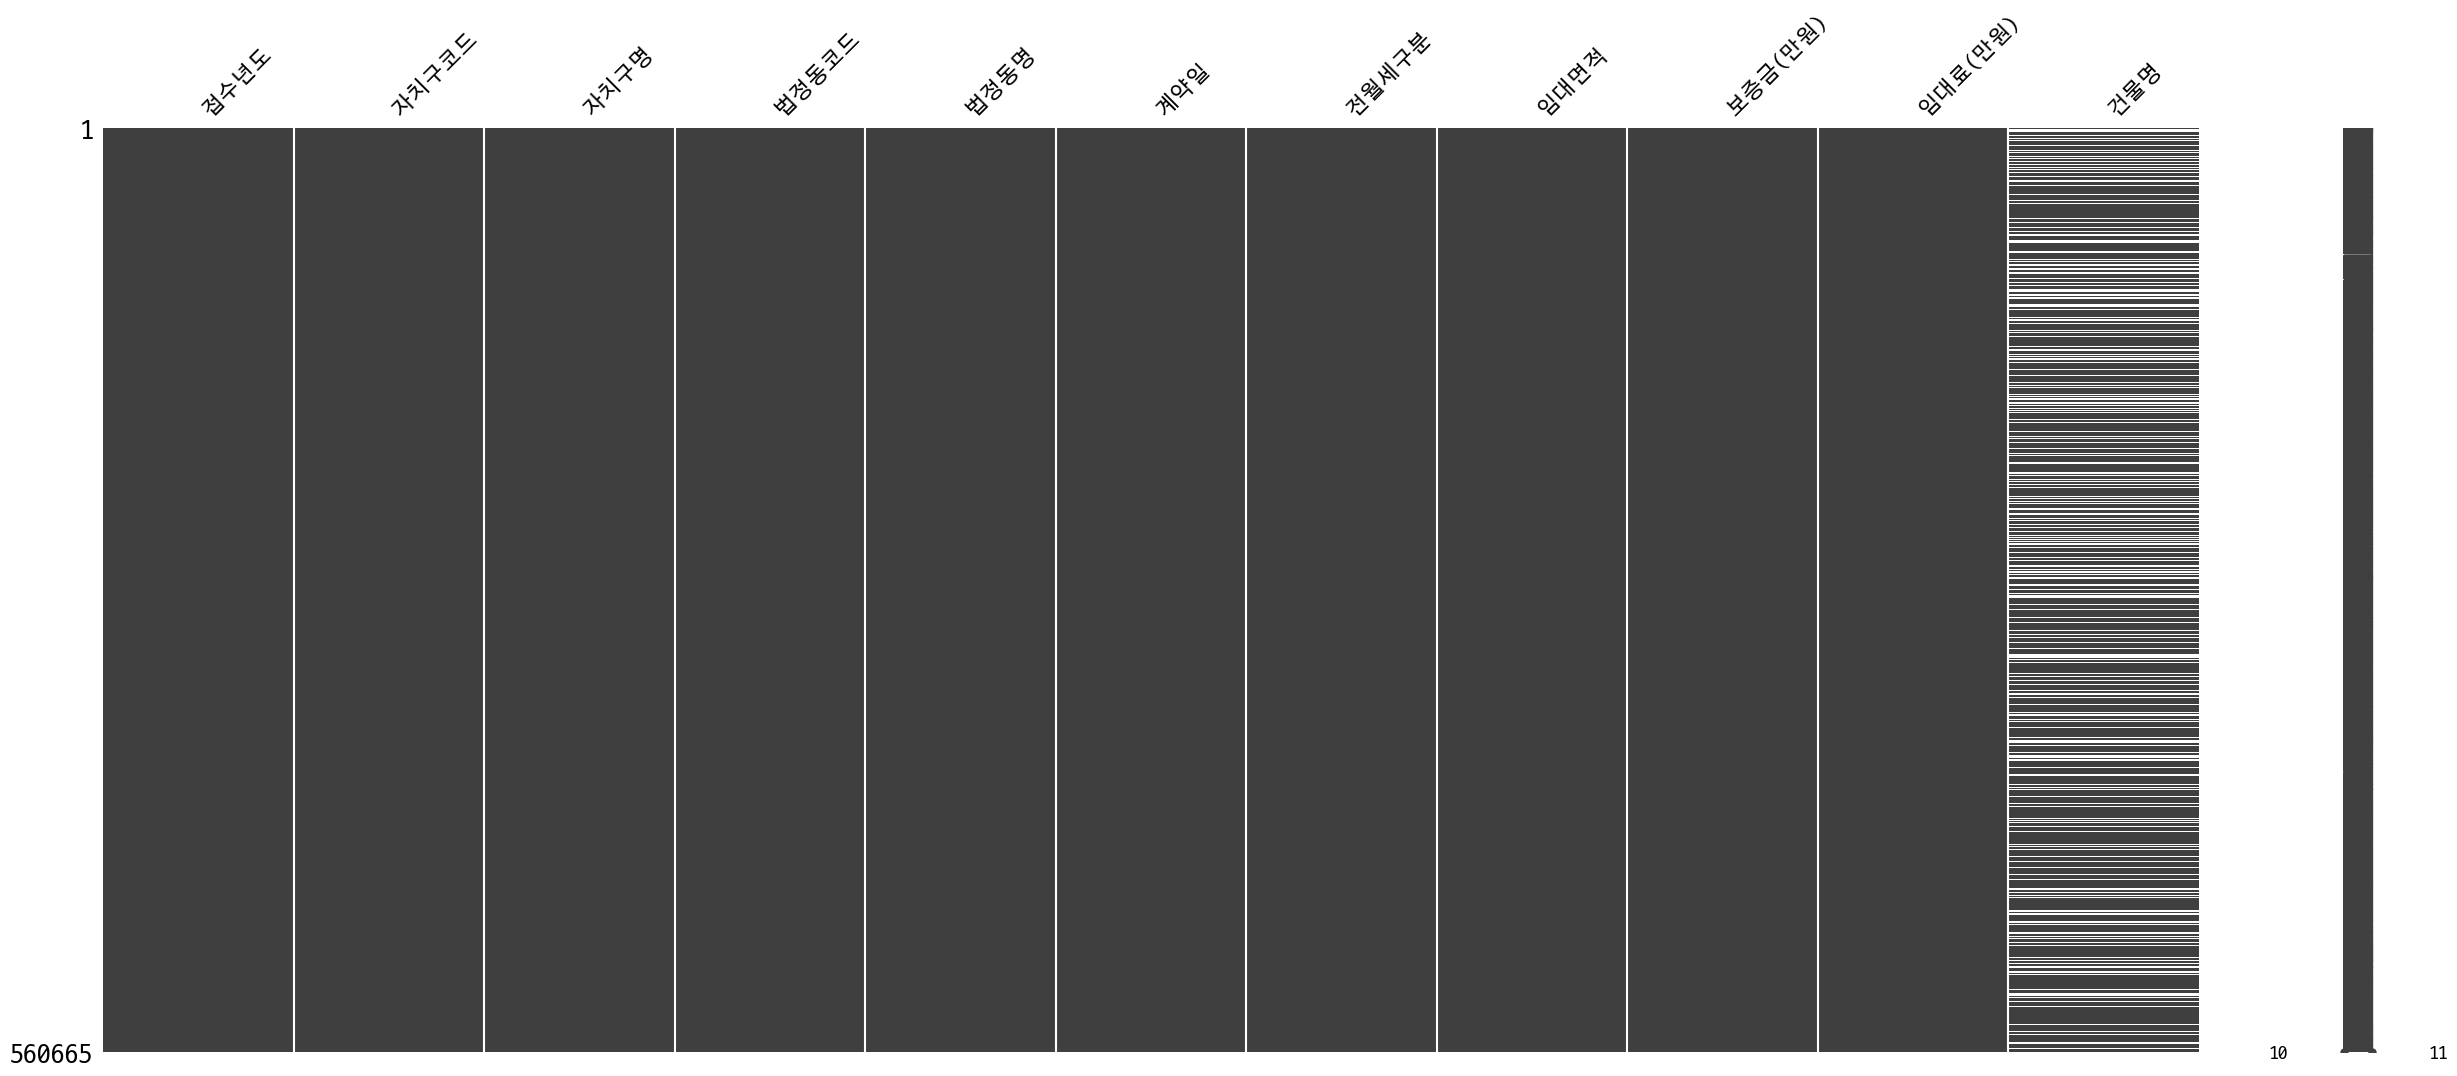

In [10]:
msno.matrix(house , figsize=(30, 12))
plt.show()

In [ ]:
value_columns = ['상호명', '지점명', '상권업종대분류명', '상권업종중분류명',  '상권업종소분류명',  '시도명','시군구명', '행정동명','법정동명', '지번주소', 
                 '도로명주소',  '경도', '위도']
house_col = house[value_columns]
house_col

In [ ]:
del house

In [ ]:
house_col.isnull().sum()

# 데이터프레임에서 서울 데이터만 추출한다.

In [ ]:
# 서울만 시각화해보면 서울 지도하고 비슷하게 나온다. 
(
    ggplot(house_col, aes(x='경도', y='위도'))
        + geom_point(size=0.2, alpha=0.2)
        + theme(text=element_text(family='D2Coding') , figure_size=(10,7))
)

# 데이터프레임의 도로명주소 열을 활용해서 '시도', '구군', '도로명' 열을 만든다.

In [ ]:
# split() 메소드에 expend=True 옵션을 지정해서 공백을 경계로 문자열을 서로 다른 열(데이터프레임)로 구분해서 '시도''구군''도로명 열을 만든다.
print(type(house_col[:1].도로명주소.str)) #Series에는 split속성이 없다. - 스트링으로 형변환
print(type(house_col[:1].도로명주소.str.split(' '))) # 다시 시리즈로 변환
print('-' * 80)
print(type(house_col[:1].도로명주소.str.split(' ' , expand=True))) # 데이터프레임으로 속성 변환
print(house_col[:1].도로명주소.str.split(' ' , expand=True)[0]) # 데이터프레임의 열 이름을 추가
print(house_col[:1].도로명주소.str.split(' ' , expand=True)[1])
print(house_col[:1].도로명주소.str.split(' ' , expand=True)[2])

In [ ]:
house_col['시도'] = house_col.도로명주소.str.split(' ' , expand=True)[0]
house_col['구군'] = house_col.도로명주소.str.split(' ' , expand=True)[1]
house_col['도로명'] = house_col.도로명주소.str.split(' ' , expand=True)[2]
house_col

In [ ]:
(
    ggplot(house_col, aes(x='경도', y='위도', color='구군'))
        + geom_point(size=0.2, alpha=0.2)
        + theme(text=element_text(family='D2Coding') , figure_size=(10,7))
)

In [ ]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=house_col, x = '경도', y = '위도', hue='구군')
plt.show()

In [ ]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=house_col, x = '경도', y = '위도', hue='상권업종대분류명')
plt.show()

In [ ]:
house_col = house_col[house_col.상권업종대분류명 == '교육']
house_col

In [ ]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=house_col, x = '경도', y = '위도', hue='상권업종중분류명', s=15)
plt.show()

# 입시 학원

In [ ]:
house_col_edu = house_col[house_col.상권업종소분류명 == '입시·교과학원']
house_col_edu

In [ ]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=house_col_edu, x = '경도', y = '위도', hue='구군', s=15)
plt.show()